#  Audio Steganography

### Hiding audio and images in audio
This week you will be exploring 2 methods of hiding data in an audio signal.
The first task will cover how to hide audio in-between the two channels of a
dual channel audio clip and the second will cover how to hide 2D images in the
frequency domain of an audio file. Both of these methods apply steganography
which is the approach of openly hiding information within other media without
encryption.


In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [21]:
Fs, raw = wavfile.read("Adele.wav")
A = np.array(raw)

Fs, raw = wavfile.read("hide.wav")
B = np.array(raw)

#inverting the channel (1-channel)

In [22]:
#converting adele from one channel to 2 channels

print(A.shape) #original A (has one dimention)

A = np.tile(A[:, np.newaxis], (1,2))
A = A.astype("float64")
#flipping the second channel

print(A.shape)#confirming that it now has 2 channels

(882000,)
(882000, 2)


In [23]:
A[:,1] = -A[:,1]
#wavfile.write("Adele_out.wav", Fs, A.astype("int32"))

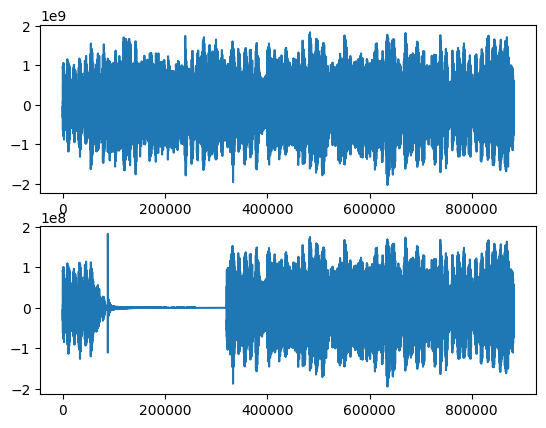

In [27]:
Tlen = Fs *1 #transition len (*1 sec)
Delay = Fs *1

# A_masking = np.array(A[:,0])
# mask = np.concatenate((np.linspace(1,0,Tlen), np.zeros_like(B), np.linspace(0,1,Tlen)))
# A_masking[Delay:Delay+mask.shape[0]] *= mask
# A_masking[Delay+Tlen:Delay+Tlen+B.shape[0]] = B
# A_masking /= 10
# A[:,0] += A_masking/2
# A[:,1] += A_masking/2

A_masking = np.array(A[:,0])
mask = np.concatenate((np.linspace(1,0,Tlen), np.zeros(Tlen), np.linspace(0,1,Tlen)))
A_masking[Delay:Delay+mask.shape[0]] *= mask
A_masking[Delay+Tlen:Delay+Tlen+B.shape[0]] = B[:,0]
A_masking /= 10
A[:,0] += A_masking/2
A[:,1] += A_masking/2


#plt.plot(mask)
plt.subplot(211)
plt.plot(A[:,0])
plt.subplot(212)
plt.plot(A_masking)
plt.show()

In [29]:
#wavfile.write("Adele_out.wav",Fs, A.astype("int32"))

Fs, raw = wavfile.read("Adele_out.wav")

time_dom = np.array(raw)
time_dom = np.mean(time_dom, axis=1)

#wavfile.write("Adele_out_mono.wav", Fs, time_dom.astype("int32"))

In [30]:
from scipy import signal
import cv2

C:\Users\Nikita\AppData\Local\Temp\ipykernel_6772\2030435666.py:7: RuntimeWarning: invalid value encountered in log
  plt.pcolormesh(X,Y, np.log(Zxx.real))


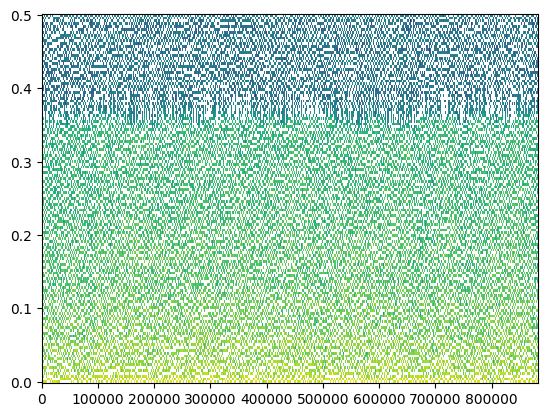

In [31]:
Fs, raw = wavfile.read("Adele.wav")
time_dom = np.array(raw)

f, t, Zxx = signal.stft(time_dom) #freq, time, signals

X, Y = np.meshgrid(t, f)
plt.pcolormesh(X,Y, np.log(Zxx.real))
plt.show()

In [32]:
img = cv2.imread("img.jpg", 0) #read as gray scale
print(img.shape)
img = cv2.flip(img, 0)

width = int(Zxx.shape[1])
height = int(Zxx.shape[0])

img = cv2.resize(img, (width, height), cv2.INTER_NEAREST).astype("float64")

print (img.shape, Zxx.shape)

(40, 141)
(129, 6892) (129, 6892)


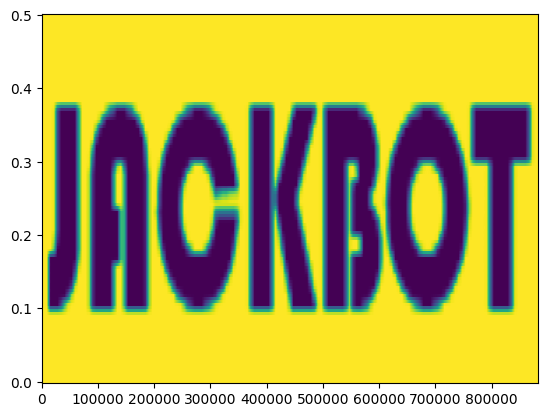

In [33]:
plt.pcolormesh(X,Y, img)
plt.show()

In [ ]:
#img /= np.max(img)
#Zxx *= img
#if values of image close to 0
#instead of the piece that is below

C:\Users\Nikita\AppData\Local\Temp\ipykernel_6772\2534344355.py:3: RuntimeWarning: invalid value encountered in log
  plt.pcolormesh(X,Y, np.log(Zxx.real))


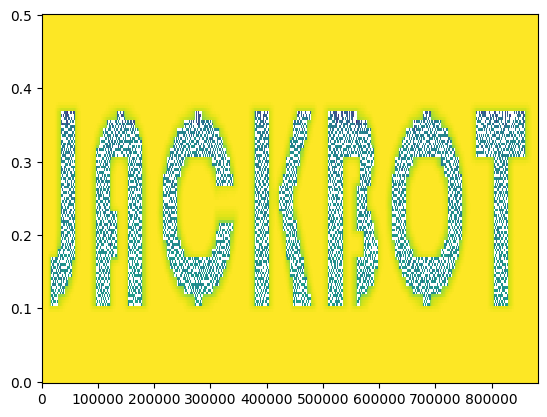

In [38]:
img *= 1e5
Zxx += img + img*1j
plt.pcolormesh(X,Y, np.log(Zxx.real))
plt.show()

In [35]:
print(np.max(Zxx))
print(np.max(img))

(1214140933.4352183+25500000j)
25500000.0


In [36]:
_, time_dom = signal.istft(Zxx)
#wavfile.write("Adele_stft.wav", Fs, time_dom.astype("int32"))

C:\Users\Nikita\AppData\Local\Temp\ipykernel_6772\3031892632.py:6: RuntimeWarning: invalid value encountered in log
  plt.pcolormesh(X,Y, np.log(Zxx2.real))


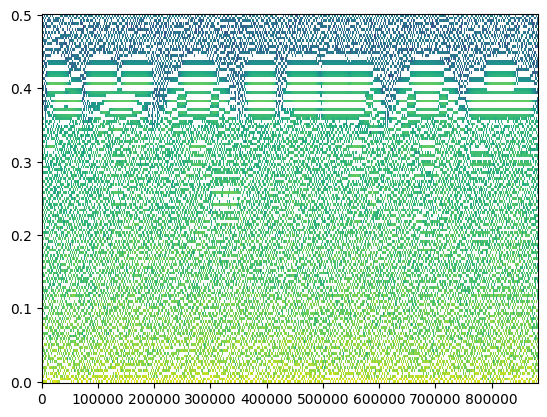

In [37]:
Fs, raw = wavfile.read("Adele_stft.wav")
time_dom = np.array(raw)

f, t, Zxx2 = signal.stft(time_dom)
X,Y = np.meshgrid(t, f)
plt.pcolormesh(X,Y, np.log(Zxx2.real))
plt.show()